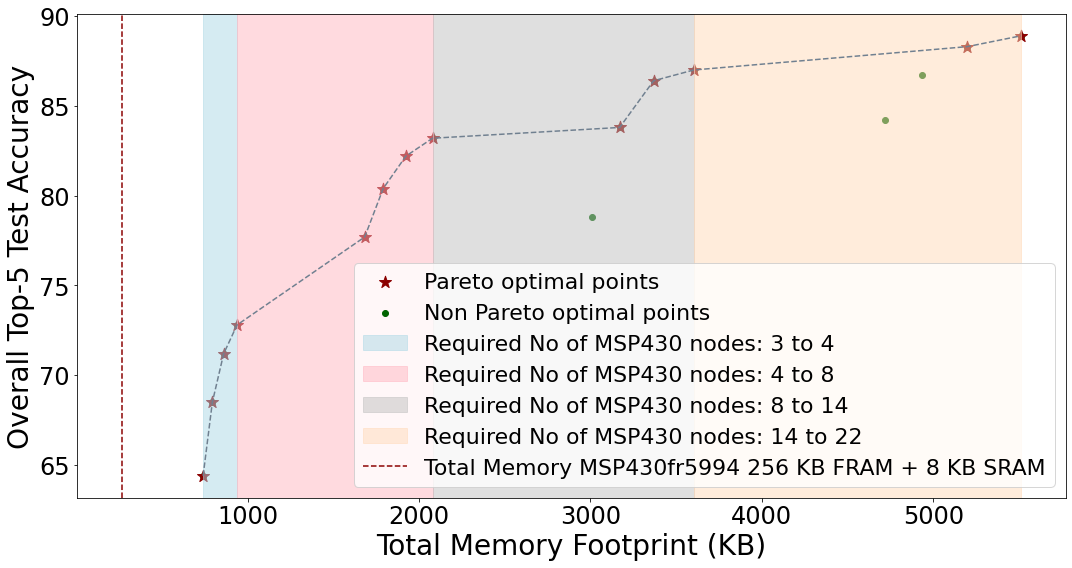

In [ ]:
# Plot the pareto optimal overall test accuracy vs total inference memory tradeoff for mobilenet neural networks 
# To Plot: Stacked bar graph for layerwise memory breakdown of Original LeNet-5 for O3 Compiler and 16 MHz on msp430fr5994
# All the 32 tensorflow lite mobilenet models were downloaded from https://github.com/tensorflow/models/blob/master/research/slim/nets/mobilenet_v1.md
# Accuracy data for all 32 models were taken as it is from https://github.com/tensorflow/models/blob/master/research/slim/nets/mobilenet_v1.md
# Total memory for each model had 3 components: model_size (.tflite file size) + arena size (memory needed to store the intermediate tensors: It was estimated for each using out arena_estimation.py script located inside tensorflow_lite_arena_estimation folder) 
# + Code size (.text memory estimated by compiling inference code with all the tensorflow lite int8 operators as needed for the mobilenet inference using Code composer studio (CCS) using gcc compiler for msp430fr5994 as shown in the tensorflow_lite_code_estimation_folder )
import matplotlib.pyplot as plt
import matplotlib
# plt.rcParams["font.family"] = "Times New Roman"
# plt.rcParams['text.usetex'] = True


plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42


import numpy as np

w=0.07

Test_acc=[88.9, 88.3, 86.7, 84.2, 87.0, 86.4, 83.8, 78.8, 83.2, 82.2, 80.4, 77.7, 72.8, 71.2, 68.5,  64.4] # in %
Total_memory=[5510.5, 5198.4, 4934.4, 4718.4, 3602.4, 3368.4, 3170.4, 3008.4, 2078.4, 1922.4, 1790.4, 1682.4, 937.4, 859.4, 793.4, 739.4] # in KB

scores = [[0 for i in range(2)] for j in range(16)]

for i in range(16):
    scores[i][0]=Total_memory[15-i]
    scores[i][1]=Test_acc[15-i]
  
scores=np.asarray(scores)
x = scores[:, 0]
y = scores[:, 1]

def identify_pareto(scores):
    # Count number of items
    population_size = scores.shape[0]
    # Create a NumPy index for scores on the pareto front (zero indexed)
    population_ids = np.arange(population_size)
    # Create a starting list of items on the Pareto front
    # All items start off as being labelled as on the Parteo front
    pareto_front = np.ones(population_size, dtype=bool)
    # Loop through each item. This will then be compared with all other items
    for i in range(population_size):
        # Loop through all other items
        for j in range(i):
            # Check if our 'i' pint is dominated by out 'j' point
            if  any(scores[j] > scores[i]):
                # j dominates i. Label 'i' point as not on Pareto front
                pareto_front[i] = 0
                # Stop further comparisons with 'i' (no more comparisons needed)
                break
    # Return ids of scenarios on pareto front
    return population_ids[pareto_front]

population_size = scores.shape[0]
population_size

population_ids = np.arange(population_size)
population_ids

pareto_front = np.ones(population_size, dtype=bool)
pareto_front


for i in range(population_size):
        # Loop through all other items
        for j in range(i):
            # Check if our 'i' pint is dominated by out 'j' point
            if  (scores[j][1] > scores[i][1]):
                # j dominates i. Label 'i' point as not on Pareto front
                pareto_front[i] = 0
                # Stop further comparisons with 'i' (no more comparisons needed)
                break

population_size = scores.shape[0]

population_size

population_ids = np.arange(population_size)

pareto = identify_pareto(scores)
# print ('Pareto front index vales')
# print ('Points on Pareto front: \n',pareto)

pareto_front = scores[pareto]
# print ('\nPareto front scores')
# print (pareto_front)



x_all = scores[:, 0]
y_all = scores[:, 1]
x_pareto = pareto_front[:, 0]
y_pareto = pareto_front[:, 1]
params = {'figure.figsize': [15, 8], 'legend.fontsize': 12}
plt.rcParams.update(params)
r=plt.scatter(x_all, y_all, color='darkgreen')


a=plt.axvspan(x_pareto[0],x_pareto[3],alpha=0.5, color='lightblue') #n=3 to 4
b=plt.axvspan(x_pareto[3],x_pareto[7],alpha=0.5, color='lightpink') #n=4 to 8
c=plt.axvspan(x_pareto[7],x_pareto[10],alpha=0.5, color='silver') # n= 8 to 14
d=plt.axvspan(x_pareto[10],x_pareto[12],alpha=0.5, color='peachpuff') # n= 14 to 22
q=plt.scatter(x_pareto,y_pareto, marker='*', s=160, color='darkred')


plt.plot(x_pareto, y_pareto, color='slategray',linestyle='dashed')
#plt.legend((q,r,a,b,c,d),('Pareto optimal points','Non Pareto optimal points','Required No of MSP430 nodes: 3 to 4','Required No of MSP430 nodes: 4 to 8','Required No of MSP430 nodes: 8 to 14','Required No of MSP430 nodes: 14 to 22'),loc="lower right",prop={'size': 22})


plt.ylabel('Overall Top-5 Test Accuracy',size=28)
plt.xlabel('Total Memory Footprint (KB)',size=28)
#plt.text(300,70,'Total Memory MSP430fr5994 256 KB FRAM + 8 KB SRAM',rotation=90,size=12)
#plt.text(300,0,'Total Memory MSP430fr5994 256 KB FRAM + 8 KB SRAM',rotation=90,size=14)
z=plt.axvline(x=264, color='darkred',  linestyle='dashed',label='Total Memory msp430fr5994 256 KB FRAM + 8 KB SRAM')
plt.yticks(size=24)
plt.xticks(size=24)

plt.legend((q,r,a,b,c,d,z),('Pareto optimal points','Non Pareto optimal points','Required No of MSP430 nodes: 3 to 4','Required No of MSP430 nodes: 4 to 8','Required No of MSP430 nodes: 8 to 14','Required No of MSP430 nodes: 14 to 22','Total Memory MSP430fr5994 256 KB FRAM + 8 KB SRAM'),loc="lower right",prop={'size': 22})


plt.ticklabel_format(axis='x',style='plain',useOffset=False)
# plt.title("Human activity recognition pruning pareto optimal curve for: Overall test accuracy vs Model(weights) memory", size=20)
plt.tight_layout()
plt.savefig("Mobilenet_pareto.pdf", bbox_inches='tight', dpi=600)
plt.savefig("Mobilenet_pareto.png", bbox_inches='tight', dpi=600)
plt.show()